<a href="https://colab.research.google.com/github/Celinekimm/Patent-Analysis/blob/main/ExponentialSmoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('cleanpatent.csv',encoding='cp949')

In [ ]:
import spacy

In [ ]:
nlp =spacy.load('en_core_web_sm')

In [ ]:
def extract_n(text):
    doc = nlp(text)
    words = []
    for token in doc:
        if token.tag_[0] in 'NVA': #If the first word N or V:
            words.append(token.lemma_)
    return words
def lower(text):
    doc = nlp(text)
    words = []
    for token in doc:
      words.append(token.text.lower())
    return words


In [ ]:
data['review'] = data['review'] .astype('str')

In [ ]:
data['review'] = data['review'].apply(extract_n) #  Extraction noun or Vocab

In [ ]:
col_name=['review'] # Creat the new column in df
df=pd.DataFrame(data['review'], columns=col_name)

In [ ]:
df= df.astype('str')

In [ ]:
# Pre-processing
df['review']=df['review'].str.replace(pat='[', repl='')
df['review']=df['review'].str.replace(pat=']', repl='')
df['review']=df['review'].str.replace(pat=',', repl='')
df['review']=df['review'].str.replace(pat='\'', repl='')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,review
0,Telehealth communication hub device service pl...
1,Method apparatus artifact mitigation sensor
2,Method apparatus monitor message status mediat...
3,search space machine type communication
4,enable network trigger change network slice


In [ ]:
df.to_csv("data2.csv",encoding='CP949')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv=CountVectorizer(max_features=10000)
dtm=cv.fit_transform(df.review)

In [ ]:
word_count_tf=pd.DataFrame({'word':cv.get_feature_names(), 'frequency': dtm.sum(axis=0).flat})

In [ ]:
word_count_tf=word_count_tf.sort_values('frequency', ascending=False)

In [ ]:
word_count_tf.to_csv('word_count_tf.csv',encoding='cp949')

In [ ]:
# Tf-IDF
df['review'] # Tokenization
doc_num = len(df['review'])

In [ ]:
cv = CountVectorizer()
tdm = cv.fit_transform(df['review'])
tdm = tdm.toarray()
tdm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
words = cv.get_feature_names()
word_count = tdm.sum(axis=0)

In [ ]:
tdm[tdm > 1] = 1
word_doc = tdm.sum(axis=0)

In [ ]:
import numpy as np
tf = word_count / doc_num
idf = np.log(doc_num /1+ word_doc)
tf_idf = tf * idf

In [ ]:
TF_IDF = pd.DataFrame({'Word': words, 'Score': tf_idf})
TF_IDF = TF_IDF.sort_values(by=['Score'], axis=0, ascending=False)

In [ ]:
TF_IDF.to_csv('word_count_tfidf2.csv',encoding='cp949')

In [ ]:
import matplotlib.pyplot as plt

df.head(12)

,review
0,Telehealth communication hub device service pl...
1,Method apparatus artifact mitigation sensor
2,Method apparatus monitor message status mediat...
3,search space machine type communication
4,enable network trigger change network slice
5,method system device granularity classificatio...
6,communication device capability spectrum
7,api obtain device behavior classifier model cloud
8,method system generate application model targe...
9,learning analysis device


In [ ]:
from ast import increment_lineno
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"

In [ ]:
TF_IDF.head(10)

,Word,Score
311,method,2.362957
480,system,1.797254
139,device,1.038619
524,use,0.724249
30,antibody,0.540119
56,bind,0.449228
33,apparatus,0.413088
512,treatment,0.286371
391,protein,0.268338
318,molecule,0.250323


In [ ]:
onl2 = pd.read_csv('onl_count.csv',encoding='cp949')

In [ ]:
df2 = onl2.set_index('Score')
df2.head()

,Count
Score,
2.362957,311
1.797254,480
1.038619,139
0.724249,524
0.540119,30


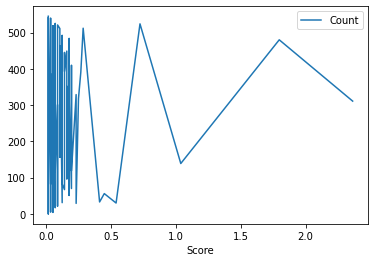

In [ ]:
df2.plot()

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(onl2)

alpha = 0.2
model = ses.fit(smoothing_level = alpha, optimized = False)

ValueError: ignored

In [ ]:
forcast = model.forecast(3)
forcast

In [ ]:
ax = data.plot(marker = 'o', figsize = (12,8), legend = True)

forcast.plot(ax = ax)

In [ ]:
<AxesSubplot:xlabel='month'>

In [ ]:
y = [3, 5, 9, 20]

## Start with the first point
forcast = [y[0]]
alpha = .4

for i in range(1, len(y)):
    predict = alpha * y[i - 1] + (1 - alpha) * forcast[i - 1]
    forcast.append(predict)

forcast